In [1]:
# Import Packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Folder path
folder_path = r'C:\MIDS\ADS-506-Applied_Time_Series_Analysis\Bitcoin_time_series_analysis_and_forecast\data'

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Create a dictionary to store DataFrames
dataframes = {}

# Read each CSV file into a DataFrame and store it in the dictionary
for csv_file in csv_files:
    file_name = os.path.basename(csv_file)  # Extract the file name from the path
    short_name = os.path.splitext(file_name)[0]  # Remove the file extension
    df = pd.read_csv(os.path.join(folder_path, csv_file))
    dataframes[short_name] = df

# Rename and create new DataFrames with shorter names
inflation_df = dataframes['5-Year Breakeven Inflation Rate - 2018-2021']
brent_oil_df = dataframes['Crude Oil Prices Brent - Europe - 2018-2021']
wti_oil_df = dataframes['Crude Oil WTI Futures Historical Data - 2018-2021']
federal_funds_df = dataframes['Daily Federal Funds Rate from 2018-2021']
treasury_rates_df = dataframes['daily-treasury-rates - 2018-2021']
crypto_df = dataframes['Digital_Currency']
djia_df = dataframes['Dow Jones Industrial Average-DJIA - 2018-2021']
uncertainty_df = dataframes['Economic Policy Uncertainty Index for United States - 2018-2021']

# Convert date columns to datetime format for each DataFrame
inflation_df['DATE'] = pd.to_datetime(inflation_df['DATE'])
brent_oil_df['DATE'] = pd.to_datetime(brent_oil_df['DATE'])
wti_oil_df['Date'] = pd.to_datetime(wti_oil_df['Date'])
federal_funds_df['DATE'] = pd.to_datetime(federal_funds_df['DATE'])
treasury_rates_df['Date'] = pd.to_datetime(treasury_rates_df['Date'])
crypto_df['Unnamed: 0'] = pd.to_datetime(crypto_df['Unnamed: 0'])
djia_df['DATE'] = pd.to_datetime(djia_df['DATE'])
uncertainty_df['DATE'] = pd.to_datetime(uncertainty_df['DATE'])

# Rename all date columns to "Date" in all DataFrames
inflation_df.rename(columns={'DATE': 'Date'}, inplace=True)
brent_oil_df.rename(columns={'DATE': 'Date'}, inplace=True)
wti_oil_df.rename(columns={'Date': 'Date'}, inplace=True)
federal_funds_df.rename(columns={'DATE': 'Date'}, inplace=True)
treasury_rates_df.rename(columns={'Date': 'Date'}, inplace=True)
crypto_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
djia_df.rename(columns={'DATE': 'Date'}, inplace=True)
uncertainty_df.rename(columns={'DATE': 'Date'}, inplace=True)

# Define a function to convert object and integer columns to float
def convert_to_float(df):
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Coerce non-numeric values to NaN

# Convert object and integer columns to float in each DataFrame
convert_to_float(inflation_df)
convert_to_float(brent_oil_df)
convert_to_float(wti_oil_df)
convert_to_float(federal_funds_df)
convert_to_float(treasury_rates_df)
convert_to_float(crypto_df)
convert_to_float(djia_df)
convert_to_float(uncertainty_df)

In [3]:
def analyze_data(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name', 'dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2), 2)

        if df[name].dtype in ['float64', 'int64']:
            summary.loc[summary['Name'] == name, 'Skewness'] = round(stats.skew(df[name]), 2)
            summary.loc[summary['Name'] == name, 'Kurtosis'] = round(stats.kurtosis(df[name]), 2)
            summary.loc[summary['Name'] == name, 'Min'] = df[name].min()
            summary.loc[summary['Name'] == name, 'Mean'] = df[name].mean()
            summary.loc[summary['Name'] == name, 'Median'] = df[name].median()
            summary.loc[summary['Name'] == name, 'Max'] = df[name].max()
            summary.loc[summary['Name'] == name, 'Std'] = df[name].std()

            # Outlier detection using IQR
            Q1 = df[name].quantile(0.25)
            Q3 = df[name].quantile(0.75)
            IQR = Q3 - Q1
            outliers = df[(df[name] < Q1 - 1.5 * IQR) | (df[name] > Q3 + 1.5 * IQR)]
            summary.loc[summary['Name'] == name, 'Outliers'] = len(outliers)

    return summary

In [4]:
# Analyze the dataset and store the summary
summary = analyze_data(inflation_df)
summary

Dataset Shape: (715, 2)


,Name,dtypes,Missing,Uniques,First Value,Entropy,Skewness,Kurtosis,Min,Mean,Median,Max,Std,Outliers
0,Date,datetime64[ns],0,715,2018-05-07 00:00:00,9.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T5YIE,float64,32,144,2.11,6.69,NaN,NaN,0.14,1.596779,1.62,2.21,0.381569,60.0


In [5]:
# Analyze the dataset and store the summary
summary = analyze_data(brent_oil_df)
summary

Dataset Shape: (714, 2)


,Name,dtypes,Missing,Uniques,First Value,Entropy,Skewness,Kurtosis,Min,Mean,Median,Max,Std,Outliers
0,Date,datetime64[ns],0,714,2018-05-08 00:00:00,9.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DCOILBRENTEU,float64,17,639,74.16,9.27,NaN,NaN,9.12,57.884577,61.22,86.07,15.340016,0.0


In [6]:
# Analyze the dataset and store the summary
summary = analyze_data(wti_oil_df)
summary

Dataset Shape: (722, 7)


,Name,dtypes,Missing,Uniques,First Value,Entropy,Skewness,Kurtosis,Min,Mean,Median,Max,Std,Outliers
0,Date,datetime64[ns],0,722,2021-01-29 00:00:00,9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Price,float64,0,660,52.2,9.32,-1.00,2.81,-37.63,52.499529,54.175,76.41,13.239923,6.0
2,Open,float64,0,650,52.15,9.29,-0.77,0.87,-14.00,52.571385,54.290,76.18,13.045445,5.0
3,High,float64,0,657,53.25,9.31,-0.61,0.12,13.69,53.478906,55.250,76.90,12.702680,2.0
4,Low,float64,0,662,51.93,9.32,-1.13,3.42,-40.32,51.548726,53.430,74.93,13.566235,7.0
5,Vol.,float64,722,0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,Change %,float64,722,0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [7]:
# Analyze the dataset and store the summary
summary = analyze_data(federal_funds_df)
summary

Dataset Shape: (1000, 2)


,Name,dtypes,Missing,Uniques,First Value,Entropy,Skewness,Kurtosis,Min,Mean,Median,Max,Std,Outliers
0,Date,datetime64[ns],0,1000,2018-05-07 00:00:00,9.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DFF,float64,0,47,1.7,4.54,-0.51,-1.46,0.04,1.40476,1.82,2.45,0.951071,0.0


In [8]:
# Analyze the dataset and store the summary
summary = analyze_data(treasury_rates_df)
summary

Dataset Shape: (1001, 11)


,Name,dtypes,Missing,Uniques,First Value,Entropy,Skewness,Kurtosis,Min,Mean,Median,Max,Std,Outliers
0,Date,datetime64[ns],0,1001,2018-01-02 00:00:00,9.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4 WEEKS BANK DISCOUNT,float64,0,148,1.27,6.29,0.04,-1.76,-0.04,1.066733,1.46,2.46,0.953259,0.0
2,4 WEEKS COUPON EQUIVALENT,float64,0,146,1.29,6.29,0.04,-1.76,-0.04,1.084216,1.48,2.51,0.969830,0.0
3,8 WEEKS BANK DISCOUNT,float64,198,107,NaN,5.64,NaN,NaN,-0.03,0.915791,0.11,2.43,0.997294,0.0
4,8 WEEKS COUPON EQUIVALENT,float64,198,109,NaN,5.66,NaN,NaN,-0.03,0.932491,0.11,2.48,1.016954,0.0
5,13 WEEKS BANK DISCOUNT,float64,0,138,1.42,6.23,0.01,-1.79,-0.05,1.097003,1.51,2.43,0.969087,0.0
6,13 WEEKS COUPON EQUIVALENT,float64,0,144,1.44,6.26,0.01,-1.79,-0.05,1.118492,1.54,2.49,0.989786,0.0
7,26 WEEKS BANK DISCOUNT,float64,0,130,1.58,6.20,0.01,-1.80,0.02,1.141159,1.53,2.51,0.994317,0.0
8,26 WEEKS COUPON EQUIVALENT,float64,0,133,1.61,6.22,0.01,-1.80,0.02,1.169750,1.57,2.58,1.021746,0.0
9,52 WEEKS BANK DISCOUNT,float64,0,157,1.78,6.50,0.05,-1.77,0.04,1.174326,1.50,2.65,1.010673,0.0


In [9]:
# Analyze the dataset and store the summary
summary = analyze_data(crypto_df)
summary

Dataset Shape: (1000, 10)


,Name,dtypes,Missing,Uniques,First Value,Entropy,Skewness,Kurtosis,Min,Mean,Median,Max,Std,Outliers
0,Date,datetime64[ns],0,1000,2021-01-30 00:00:00,9.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,open_SAR,float64,0,1000,128437.248512,9.97,2.90,10.10,12045.197184,34825.322255,30714.632128,152217.334784,21728.028028,79.0
2,open_USD,float64,0,1000,34246.28,9.97,2.90,10.10,3211.710000,9285.762120,8189.695000,40586.960000,5793.522832,79.0
3,high_SAR,float64,0,966,131012.7232,9.90,2.97,10.41,12288.185600,35789.618165,31321.953152,157329.280000,22785.946842,80.0
4,high_USD,float64,0,966,34933.0,9.90,2.97,10.41,3276.500000,9542.880270,8351.630000,41950.000000,6075.604427,80.0
5,low_SAR,float64,0,970,123106.88,9.91,2.78,9.30,11837.237504,33796.329057,30010.869568,145215.488000,20565.410145,80.0
6,low_USD,float64,0,970,32825.0,9.91,2.78,9.30,3156.260000,9011.393200,8002.045000,38720.000000,5483.524463,80.0
7,close_SAR,float64,0,999,128333.212416,9.96,2.89,9.91,12045.234688,34917.483572,30713.263232,152201.770624,21928.280072,80.0
8,close_USD,float64,0,999,34218.54,9.96,2.89,9.91,3211.720000,9310.335850,8189.330000,40582.810000,5846.917681,80.0
9,volume,int64,0,990,43072,9.95,2.67,13.88,5743.000000,53100.498000,43795.500000,402201.000000,35329.832031,55.0


In [10]:
# Analyze the dataset and store the summary
summary = analyze_data(djia_df)
summary

Dataset Shape: (715, 2)


,Name,dtypes,Missing,Uniques,First Value,Entropy,Skewness,Kurtosis,Min,Mean,Median,Max,Std,Outliers
0,Date,datetime64[ns],0,715,2018-05-07 00:00:00,9.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DJIA,float64,26,688,24357.32,9.43,NaN,NaN,18591.93,26394.454311,26201.04,31188.38,1984.560842,12.0


In [11]:
# Analyze the dataset and store the summary
summary = analyze_data(uncertainty_df)
summary

Dataset Shape: (1000, 2)


,Name,dtypes,Missing,Uniques,First Value,Entropy,Skewness,Kurtosis,Min,Mean,Median,Max,Std,Outliers
0,Date,datetime64[ns],0,1000,2018-05-07 00:00:00,9.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USEPUINDXD,float64,0,988,96.74,9.94,1.65,2.69,4.05,179.53852,127.73,861.1,142.724742,62.0


In [15]:
# Merge all DataFrames on the 'Date' column
merged_df = pd.merge(inflation_df, brent_oil_df, on='Date', how='outer')


merged_df = pd.merge(merged_df, wti_oil_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, federal_funds_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, treasury_rates_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, crypto_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, djia_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, uncertainty_df, on='Date', how='outer')

# Extract day, month, and year into new columns
merged_df['Day'] = merged_df['Date'].dt.day
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Year'] = merged_df['Date'].dt.year

# Sort the DataFrame by the 'Date' column
merged_df.sort_values(by='Date', inplace=True)

# Reset the index
merged_df.reset_index(drop=True, inplace=True)

# Print all columns in the merged DataFrame
for col in merged_df.columns:
    print(col)

Date
T5YIE
DCOILBRENTEU
Price
Open
High
Low
Vol.
Change %
DFF
4 WEEKS BANK DISCOUNT
4 WEEKS COUPON EQUIVALENT
8 WEEKS BANK DISCOUNT
8 WEEKS COUPON EQUIVALENT
13 WEEKS BANK DISCOUNT
13 WEEKS COUPON EQUIVALENT
26 WEEKS BANK DISCOUNT
26 WEEKS COUPON EQUIVALENT
52 WEEKS BANK DISCOUNT
52 WEEKS COUPON EQUIVALENT
open_SAR
open_USD
high_SAR
high_USD
low_SAR
low_USD
close_SAR
close_USD
volume
DJIA
USEPUINDXD
Day
Month
Year


In [16]:
# Analyze the dataset and store the summary
summary = analyze_data(merged_df)
summary

Dataset Shape: (1318, 34)


,Name,dtypes,Missing,Uniques,First Value,Entropy,Skewness,Kurtosis,Min,Mean,Median,Max,Std,Outliers
0,Date,datetime64[ns],0,1318,2018-01-02 00:00:00,10.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T5YIE,float64,635,144,NaN,6.69,NaN,NaN,0.140000,1.596779,1.620000,2.210000,0.381569,60.0
2,DCOILBRENTEU,float64,621,639,NaN,9.27,NaN,NaN,9.120000,57.884577,61.220000,86.070000,15.340016,0.0
3,Price,float64,596,660,NaN,9.32,NaN,NaN,-37.630000,52.499529,54.175000,76.410000,13.239923,6.0
4,Open,float64,596,650,NaN,9.29,NaN,NaN,-14.000000,52.571385,54.290000,76.180000,13.045445,5.0
5,High,float64,596,657,NaN,9.31,NaN,NaN,13.690000,53.478906,55.250000,76.900000,12.702680,2.0
6,Low,float64,596,662,NaN,9.32,NaN,NaN,-40.320000,51.548726,53.430000,74.930000,13.566235,7.0
7,Vol.,float64,1318,0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,Change %,float64,1318,0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,DFF,float64,318,47,NaN,4.54,NaN,NaN,0.040000,1.404760,1.820000,2.450000,0.951071,0.0


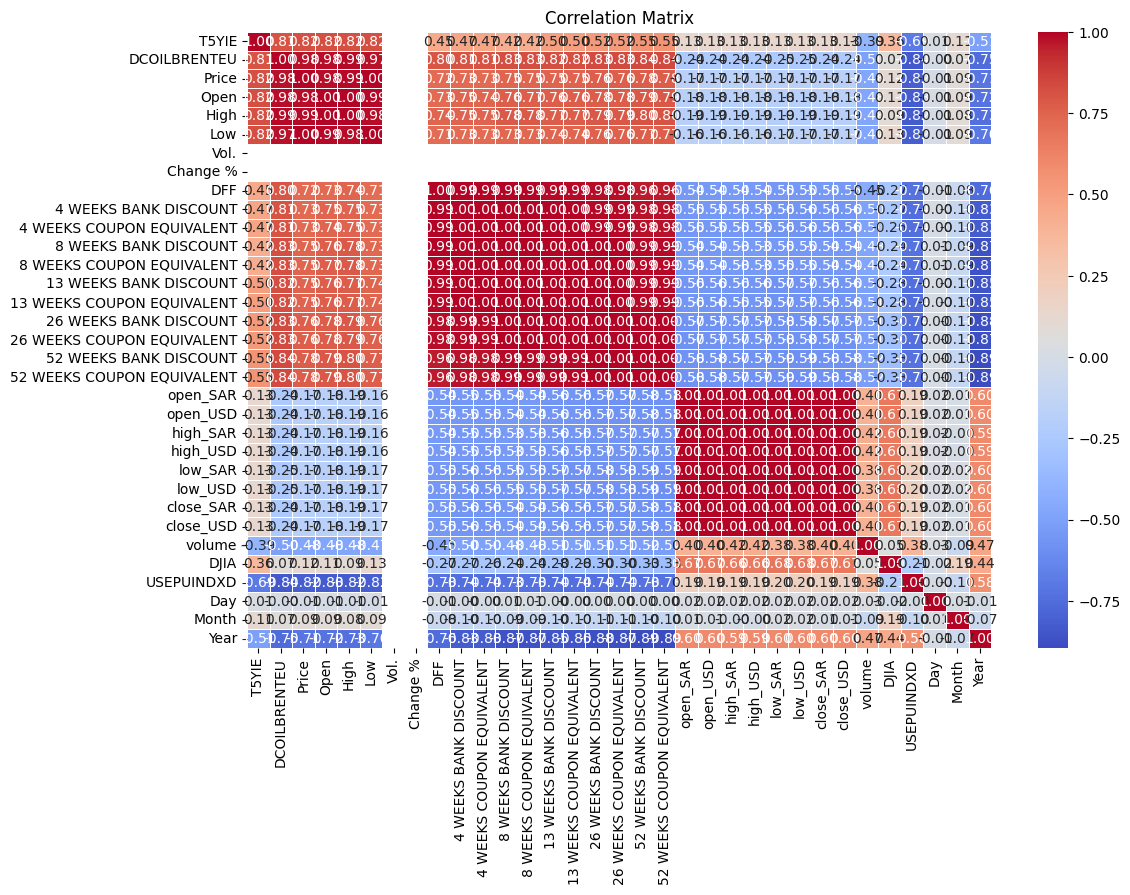

In [74]:
# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [21]:
# Select the features you want to include in PCA
features = ['T5YIE', 'DCOILBRENTEU', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'DFF', '4 WEEKS BANK DISCOUNT', '4 WEEKS COUPON EQUIVALENT', '8 WEEKS BANK DISCOUNT', '8 WEEKS COUPON EQUIVALENT', '13 WEEKS BANK DISCOUNT', '13 WEEKS COUPON EQUIVALENT', '26 WEEKS BANK DISCOUNT', '26 WEEKS COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT', '52 WEEKS COUPON EQUIVALENT', 'open_SAR', 'open_USD', 'high_SAR', 'high_USD', 'low_SAR', 'low_USD', 'close_SAR', 'close_USD', 'volume', 'DJIA', 'USEPUINDXD', 'Day', 'Month', 'Year']

# Select the features from your DataFrame
X = merged_df[features]

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of components to keep (you can adjust this number)
n_components = 10  # Adjust as needed

# Create and fit the PCA model
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Now, X_pca contains the transformed features with reduced multicollinearity
# You can use these components for modeling

ValueError: could not convert string to float: '.'

In [ ]:
# # Line Plots
# def plot_line(df, x_col, y_col, title):
#     plt.figure(figsize=(12, 6))
    
#     # Convert the 'Date' column to string for plotting
#     df[x_col] = df[x_col].astype(str)
    
#     # Convert the y-axis column to numeric
#     df[y_col] = pd.to_numeric(df[y_col], errors='coerce')
    
#     plt.plot(df[x_col], df[y_col], marker='o', linestyle='-')
#     plt.title(title)
#     plt.xlabel(x_col)
#     plt.ylabel(y_col)
#     plt.xticks(rotation=45)  # Rotate x-axis labels for readability
#     plt.grid(True)
#     plt.show()

# # ACF and PACF Plots
# def plot_acf_pacf(df, col, lags=40):
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    
#     # Data Preprocessing Step 1: Remove Missing Values
#     df = df.dropna()
    
#     # Data Preprocessing Step 2: Replace Non-Numeric Characters with NaN
#     df[col] = pd.to_numeric(df[col], errors='coerce')
    
#     # Ensure that there are enough valid data points for the specified lags
#     if len(df) > lags:
#         max_lags = lags
#     else:
#         max_lags = len(df) - 1
    
#     plot_acf(df[col].dropna(), lags=max_lags, ax=ax1)
#     plot_pacf(df[col].dropna(), lags=max_lags, ax=ax2)
#     ax1.set_title(f'ACF of {col}')
#     ax2.set_title(f'PACF of {col}')
#     plt.show()

# # Line plots and ACF/PACF for each DataFrame
# data_frames = [
#     {"df": inflation_df, "title": "5-Year Breakeven Inflation Rate"},
#     {"df": brent_oil_df, "title": "Crude Oil Prices (Brent)"},
#     {"df": wti_oil_df, "title": "Crude Oil WTI Futures"},
#     {"df": federal_funds_df, "title": "Daily Federal Funds Rate"},
#     {"df": treasury_rates_df, "title": "Daily Treasury Rates"},
#     {"df": crypto_df, "title": "Digital Currency"},
#     {"df": djia_df, "title": "Dow Jones Industrial Average (DJIA)"},
#     {"df": uncertainty_df, "title": "Economic Policy Uncertainty Index"},
# ]

# for frame in data_frames:
#     df = frame["df"]
#     title = frame["title"]

#     # Line Plot for Date vs. Column
#     for col in df.columns:
#         if col != "Date":
#             plot_line(df, "Date", col, f"{title} - {col}")

#     # ACF/PACF Plots for Column
#     for col in df.columns:
#         if col != "Date":
#             plot_acf_pacf(df, col)